In [1]:
# Necessary imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Gather macro variables

In [2]:
df = pd.read_csv("../data/WEOApr2023all.csv") 

In [3]:
countries = ["China", "Japan", "Germany", "South Korea", "France",
    "United Kingdom", "Russia", "Canada", "Italy", "Australia",
    "Spain", "Switzerland", "Netherlands", "Sweden", "Finland",
    "Belgium", "Taiwan", "Singapore", "Austria", "Denmark", "Norway",
    "Poland", "Turkey", "Portugal", "Ireland", "Czech Republic"]

In [4]:
iso = df[df['Country'].isin(countries)]['ISO'].unique()
iso

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHN', 'CZE', 'DNK', 'FIN', 'FRA',
       'DEU', 'IRL', 'ITA', 'JPN', 'NLD', 'NOR', 'POL', 'PRT', 'RUS',
       'SGP', 'ESP', 'SWE', 'CHE', 'GBR'], dtype=object)

In [5]:
# Gross domestic product, current prices
gdp_df = df[df['Subject Descriptor'] == 'Gross domestic product, current prices']  #
gdp_df = gdp_df[gdp_df['ISO'].isin(iso)]
gdp_df = gdp_df[gdp_df ["Units"] == "U.S. dollars"] 

gdp_df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
399,193,AUS,NGDPD,Australia,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",162.956,...,"1,360.69","1,646.39","1,701.89","1,707.55","1,720.12","1,787.45","1,854.39","1,929.68","2,005.40",2022.0
443,122,AUT,NGDPD,Austria,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",80.923,...,434.877,480.688,471.685,515.199,530.106,548.97,563.804,584.249,595.398,2022.0
751,124,BEL,NGDPD,Belgium,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",123.478,...,524.791,594.5,582.21,624.248,642.69,659.488,676.908,694.044,708.916,2022.0
1411,156,CAN,NGDPD,Canada,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",276.064,...,"1,647.60","2,001.49","2,139.84","2,089.67","2,178.82","2,280.96","2,385.40","2,492.36","2,605.18",2022.0
1587,924,CHN,NGDPD,China,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",303.004,...,"14,862.56","17,759.31","18,100.04","19,373.59","20,881.37","22,407.69","24,035.81","25,722.41","27,492.80",2022.0
1983,935,CZE,NGDPD,Czech Republic,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,245.975,281.791,290.397,330.483,355.859,378.374,394.847,408.88,422.35,2021.0
2027,128,DNK,NGDPD,Denmark,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",71.127,...,355.223,398.303,390.677,405.626,419.888,437.632,455.95,475.381,495.77,2022.0
2599,172,FIN,NGDPD,Finland,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",53.714,...,271.668,296.585,281.047,301.67,310.607,319.374,328.025,336.151,343.237,2022.0
2643,132,FRA,NGDPD,France,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",702.243,...,"2,635.92","2,957.42","2,784.02","2,923.49","3,018.89","3,133.40","3,232.74","3,321.71","3,390.90",2021.0
2819,134,DEU,NGDPD,Germany,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",853.705,...,"3,886.56","4,262.77","4,075.40","4,308.85","4,446.47","4,635.16","4,822.11","4,947.32","5,044.44",2022.0


In [6]:
# Inflation rate :

inflation_df = df[df['Subject Descriptor'] == 'Inflation, average consumer prices']
inflation_df = inflation_df[inflation_df['ISO'].isin(iso)]
inflation_df = inflation_df[inflation_df["Units"] == "Percent change"]
inflation_df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
413,193,AUS,PCPIPCH,Australia,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",10.136,...,0.868,2.82,6.615,5.348,3.198,3.033,2.688,2.677,2.574,2022.0
457,122,AUT,PCPIPCH,Austria,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",6.325,...,1.386,2.756,8.61,8.173,3.009,2.196,2.033,2.003,2.007,2022.0
765,124,BEL,PCPIPCH,Belgium,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",6.656,...,0.428,3.222,10.334,4.681,2.136,1.685,1.766,1.906,1.97,2022.0
1425,156,CAN,PCPIPCH,Canada,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",10.183,...,0.717,3.401,6.797,3.899,2.385,1.875,1.879,1.901,1.968,2022.0
1601,924,CHN,PCPIPCH,China,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",NaN,...,2.49,0.853,1.876,1.985,2.191,2.2,2.2,2.2,2.2,2022.0
1997,935,CZE,PCPIPCH,Czech Republic,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",NaN,...,3.161,3.84,15.1,11.775,5.825,2.7,2,2,2,2022.0
2041,128,DNK,PCPIPCH,Denmark,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",11.339,...,0.333,1.944,8.534,4.8,2.8,2.2,2,2,2,2022.0
2613,172,FIN,PCPIPCH,Finland,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",11.602,...,0.383,2.066,7.167,5.295,2.456,2.2,2,2,2,2022.0
2657,132,FRA,PCPIPCH,France,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",13.057,...,0.526,2.066,5.904,5.045,2.463,2.146,1.736,1.563,1.557,2021.0
2833,134,DEU,PCPIPCH,Germany,"Inflation, average consumer prices",Annual percentages of average consumer prices ...,Percent change,NaN,"See notes for: Inflation, average consumer pr...",5.447,...,0.371,3.212,8.666,6.193,3.077,2.254,2.127,1.986,1.964,2022.0


In [7]:
# Net Govt debt

govt_debt_df = df[df['Subject Descriptor'] == 'General government net debt']  # Adjust the descriptor as necessary
govt_debt_df = govt_debt_df[govt_debt_df['ISO'].isin(iso)]
govt_debt_df = govt_debt_df[govt_debt_df["Units"] == "Percent of GDP"]  # Adjust units if different

# Display

govt_debt_df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
434,193,AUS,GGXWDN_NGDP,Australia,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,NaN,...,34.47,33.281,32.359,35.9,38.243,39.067,39.373,39.536,39.422,2021.0
478,122,AUT,GGXWDN_NGDP,Austria,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,NaN,...,59.335,60.139,57.698,56.375,54.727,54.182,53.428,52.7,52.357,2021.0
786,124,BEL,GGXWDN_NGDP,Belgium,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,NaN,...,97.484,94.461,91.876,93.236,95.992,99.218,102.479,105.691,108.625,2021.0
1446,156,CAN,GGXWDN_NGDP,Canada,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,14.449,...,15.727,15.378,13.926,14.058,13.907,13.683,13.122,12.522,12.045,2022.0
1622,924,CHN,GGXWDN_NGDP,China,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,935,CZE,GGXWDN_NGDP,Czech Republic,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,NaN,...,23.586,26.41,28.096,29.681,29.028,28.784,29.395,30.21,30.622,2021.0
2062,128,DNK,GGXWDN_NGDP,Denmark,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,NaN,...,14.709,10.016,6.508,4.993,4.409,4.262,4.245,4.238,4.287,2021.0
2634,172,FIN,GGXWDN_NGDP,Finland,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,62.466,...,33.32,34.347,34.14,34.545,35.723,37.622,39.375,40.968,42.415,2021.0
2678,132,FRA,GGXWDN_NGDP,France,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,NaN,...,101.749,100.559,99.045,99.418,100.391,100.762,101.328,102.157,102.974,2021.0
2854,134,DEU,GGXWDN_NGDP,Germany,General government net debt,Net debt is calculated as gross debt minus fin...,Percent of GDP,NaN,See notes for: General government net debt (N...,NaN,...,45.376,45.58,45.073,46.691,46.793,45.587,44.312,43.472,42.67,2022.0


In [8]:
# Unemployment Rates

unemployment_df = df[df['Subject Descriptor'] == 'Unemployment rate']  
unemployment_df = unemployment_df[unemployment_df['ISO'].isin(iso)]
unemployment_df = unemployment_df[unemployment_df["Units"] == "Percent of total labor force"]  

# Display
unemployment_df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
420,193,AUS,LUR,Australia,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office. Australian...,6.133,...,6.492,5.1,3.708,3.961,4.133,4.456,4.505,4.653,4.633,2022.0
464,122,AUT,LUR,Austria,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,1.6,...,5.475,6.167,4.767,5.347,5.564,5.406,5.293,5.169,5.179,2021.0
772,124,BEL,LUR,Belgium,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: Central Bank. Some indicators have bee...,8.3,...,5.575,6.258,5.5,6.019,5.981,5.647,5.582,5.533,5.487,2021.0
1432,156,CAN,LUR,Canada,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,7.517,...,9.725,7.508,5.275,5.83,6.177,6.087,5.996,5.999,6,2022.0
1608,924,CHN,LUR,China,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office. Data retri...,4.9,...,4.24,3.96,4.2,4.1,3.9,3.8,3.7,3.6,3.5,2022.0
2004,935,CZE,LUR,Czech Republic,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office. Haver Anal...,NaN,...,2.541,2.82,2.312,3.5,2.5,2.3,2.3,2.3,2.3,2021.0
2048,128,DNK,LUR,Denmark,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: Eurostat Latest actual data: 2022 Empl...,5.287,...,5.633,5.075,4.467,5.1,5.1,5,5,5,5,2022.0
2620,172,FIN,LUR,Finland,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office. Downloaded...,5.288,...,7.767,7.608,6.775,7.467,7.501,7.4,7.3,7.2,7.1,2022.0
2664,132,FRA,LUR,France,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,6.349,...,8.033,7.875,7.292,7.356,7.268,6.93,6.815,6.719,6.663,2021.0
2840,134,DEU,LUR,Germany,Unemployment rate,Unemployment rate can be defined by either the...,Percent of total labor force,NaN,Source: National Statistics Office Latest actu...,3.359,...,3.625,3.575,3.067,3.274,3.334,3.122,3.053,3.001,2.963,2022.0


In [9]:
# General government total expenditure
gvt_expenditure = df[df['Subject Descriptor'] == 'General government total expenditure']  #
gvt_expenditure = gvt_expenditure[gvt_expenditure['ISO'].isin(iso)]
gvt_expenditure = gvt_expenditure[gvt_expenditure["Units"] == "Percent of GDP"]

# Display

gvt_expenditure

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
426,193,AUS,GGX_NGDP,Australia,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,NaN,...,44.63,42.189,38.431,39.012,39.433,39.331,39.328,39.28,39.049,2021.0
470,122,AUT,GGX_NGDP,Austria,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,NaN,...,56.741,55.955,52.387,52.417,50.869,50.63,50.641,50.781,50.769,2021.0
778,124,BEL,GGX_NGDP,Belgium,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,57.053,...,58.902,55.492,53.67,55.96,56.731,56.9,56.888,56.996,57.194,2021.0
1438,156,CAN,GGX_NGDP,Canada,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,40.946,...,52.71,45.856,41.476,41.143,40.988,40.949,40.853,40.867,40.904,2022.0
1614,924,CHN,GGX_NGDP,China,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,NaN,...,35.403,32.686,33.081,32.525,32.262,32.356,32.421,32.483,32.542,2022.0
2010,935,CZE,GGX_NGDP,Czech Republic,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,NaN,...,47.219,46.514,44.842,46.167,43.613,42.723,42.709,42.736,42.758,2021.0
2054,128,DNK,GGX_NGDP,Denmark,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,52.351,...,53.536,50.804,49.189,49.389,49.787,50.04,50.386,50.493,50.547,2021.0
2626,172,FIN,GGX_NGDP,Finland,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,43.864,...,57.147,55.698,54.05,54.599,54.174,54.471,54.233,54.074,54.114,2021.0
2670,132,FRA,GGX_NGDP,France,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,46.405,...,61.512,59.08,58.468,58.061,56.664,56.05,55.585,55.386,55.521,2021.0
2846,134,DEU,GGX_NGDP,Germany,General government total expenditure,Total expenditure consists of total expense an...,Percent of GDP,NaN,See notes for: General government total expen...,NaN,...,50.408,51.253,49.704,50.656,48.762,47.851,47.789,47.608,47.607,2022.0


In [10]:
# General government total expenditure
total_inv_df = df[df['Subject Descriptor'] == 'Total investment']  #
total_inv_df = total_inv_df[total_inv_df['ISO'].isin(iso)]
total_inv_df = total_inv_df[total_inv_df["Units"] == "Percent of GDP"] 

# Display
total_inv_df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
410,193,AUS,NID_NGDP,Australia,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. Australian...,27.136,...,22.245,23.09,23.272,23.236,23.875,23.928,24.061,24.191,24.343,2022.0
454,122,AUT,NID_NGDP,Austria,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,33.133,...,25.647,27.78,27.4,25.521,24.902,24.738,24.824,24.892,25.307,2022.0
762,124,BEL,NID_NGDP,Belgium,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: Central Bank. Data before 1995 were sp...,27.394,...,24.335,26.009,28.302,27.261,26.918,26.868,26.827,26.731,26.764,2022.0
1422,156,CAN,NID_NGDP,Canada,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,22.386,...,22.257,23.805,24.544,23.255,23.188,23.289,23.368,23.376,23.376,2022.0
1598,924,CHN,NID_NGDP,China,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. Data retri...,34.964,...,42.857,43.289,43.875,43.989,44.018,43.648,43.258,42.833,42.276,2022.0
1994,935,CZE,NID_NGDP,Czech Republic,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,NaN,...,26.154,30.218,33.034,27.809,25.332,25.13,25.176,25.384,25.42,2021.0
2038,128,DNK,NID_NGDP,Denmark,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,20.124,...,22.663,22.969,24.639,25.288,25.217,25.083,25.004,24.915,24.823,2022.0
2610,172,FIN,NID_NGDP,Finland,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office. Downloaded...,31.224,...,24.493,24.042,27.274,26.443,26.35,26.838,26.906,27.143,27.334,2022.0
2654,132,FRA,NID_NGDP,France,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,25.748,...,23.718,25.012,25.764,24.66,23.887,23.63,23.593,23.575,23.535,2021.0
2830,134,DEU,NID_NGDP,Germany,Total investment,Expressed as a ratio of total investment in cu...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,30.068,...,22.09,23.29,24.83,23.751,23.695,23.772,23.736,23.846,24.007,2022.0


In [11]:
# General government savings
gvt_savings = df[df['Subject Descriptor'] == 'Gross national savings']  #
gvt_savings= gvt_savings[gvt_savings['ISO'].isin(iso)]
gvt_savings = gvt_savings[gvt_savings["Units"] == "Percent of GDP"] 

gvt_savings

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
411,193,AUS,NGSD_NGDP,Australia,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office. Australian...,21.733,...,24.512,26.236,24.802,24.621,24.118,23.703,23.755,23.801,23.898,2022.0
455,122,AUT,NGSD_NGDP,Austria,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,25.919,...,28.624,28.134,27.73,26.681,25.528,25.76,25.284,25.337,25.598,2022.0
763,124,BEL,NGSD_NGDP,Belgium,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: Central Bank. Data before 1995 were sp...,19.837,...,25.44,26.439,24.935,24.537,25.492,25.826,26.27,26.614,26.783,2022.0
1423,156,CAN,NGSD_NGDP,Canada,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,20.202,...,20.104,23.536,24.156,22.126,22.077,21.972,21.789,21.55,21.089,2022.0
1599,924,CHN,NGSD_NGDP,China,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office. Data retri...,32.631,...,44.531,45.076,46.182,45.396,45.132,44.533,43.942,43.369,42.718,2022.0
1995,935,CZE,NGSD_NGDP,Czech Republic,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,NaN,...,28.145,29.382,30.871,28.097,27.742,28.624,28.17,27.705,27.751,2021.0
2039,128,DNK,NGSD_NGDP,Denmark,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,19.501,...,30.541,32.001,37.458,34.739,32.922,32.741,32.574,32.438,32.312,2022.0
2611,172,FIN,NGSD_NGDP,Finland,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office. Downloaded...,28.775,...,25.048,24.469,23.031,23.07,24.161,25.016,25.403,25.662,26.034,2022.0
2655,132,FRA,NGSD_NGDP,France,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,25.153,...,21.921,25.371,23.976,23.178,23.62,23.641,23.702,23.913,24.084,2021.0
2831,134,DEU,NGSD_NGDP,Germany,Gross national savings,Expressed as a ratio of gross national savings...,Percent of GDP,NaN,Source: National Statistics Office Latest actu...,21.54,...,29.145,31.028,29.027,28.419,28.822,29.593,29.797,29.868,29.768,2022.0


In [12]:
# Inflation rate (End of period):

inflation_eop_df = df[df['Subject Descriptor'] == 'Inflation, end of period consumer prices']
inflation_eop_df = inflation_eop_df[inflation_eop_df['ISO'].isin(iso)]
inflation_eop_df = inflation_eop_df[inflation_eop_df["Units"] == "Percent change"]
inflation_eop_df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
415,193,AUS,PCPIEPCH,Australia,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",NaN,...,0.861,3.587,7.832,3.957,2.983,2.932,2.523,0.7,0.7,2022.0
459,122,AUT,PCPIEPCH,Austria,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",6.661,...,1.012,3.789,10.54,5.615,2.55,2.037,1.978,1.998,1.998,2022.0
767,124,BEL,PCPIEPCH,Belgium,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",8.755,...,0.351,6.592,10.213,2.142,1.479,1.898,1.726,1.95,1.971,2022.0
1427,156,CAN,PCPIEPCH,Canada,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",7.337,...,0.779,4.734,6.642,2.982,2.075,1.867,1.876,1.922,1.995,2022.0
1603,924,CHN,PCPIEPCH,China,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",NaN,...,0.16,1.391,1.806,3.184,1.31,1.478,2.2,2.2,2.2,2022.0
1999,935,CZE,PCPIEPCH,Czech Republic,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",NaN,...,2.285,6.613,15.759,8.8,4.1,2.2,2,2,2,2022.0
2043,128,DNK,PCPIEPCH,Denmark,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",10.671,...,0.486,3.482,9.626,3.8,2.8,2.2,2,2,2,2022.0
2615,172,FIN,PCPIEPCH,Finland,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",13.761,...,0.192,3.164,8.834,5.295,2.456,2.2,2,2,2,2022.0
2659,132,FRA,PCPIEPCH,France,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",13.728,...,-0.261,3.332,6.958,3.512,2.273,2.222,1.493,1.666,1.446,2021.0
2835,134,DEU,PCPIEPCH,Germany,"Inflation, end of period consumer prices",Annual percentages of end of period consumer p...,Percent change,NaN,"See notes for: Inflation, end of period consu...",NaN,...,-0.563,5.849,9.804,3.619,2.933,2.19,2.056,1.975,0.984,2022.0


In [13]:
#  country account balance :

balance_df = df[df['Subject Descriptor'] == 'Current account balance']
balance_df = balance_df[balance_df['ISO'].isin(iso)]
balance_df = balance_df[balance_df["Units"] == "Percent of GDP"]
balance_df

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
439,193,AUS,BCA_NGDPD,Australia,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-2.367,...,2.195,3.046,1.201,1.384,0.243,-0.225,-0.306,-0.39,-0.446,2021.0
483,122,AUT,BCA_NGDPD,Austria,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-4.776,...,2.977,0.354,0.329,1.16,0.626,1.022,0.46,0.445,0.291,2021.0
791,124,BEL,BCA_NGDPD,Belgium,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-3.999,...,1.105,0.43,-3.367,-2.725,-1.426,-1.045,-0.563,-0.123,0.014,2021.0
1451,156,CAN,BCA_NGDPD,Canada,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-2.205,...,-2.153,-0.269,-0.389,-1.129,-1.111,-1.317,-1.579,-1.826,-2.287,2022.0
1627,924,CHN,BCA_NGDPD,China,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,1.674,1.787,2.307,1.406,1.114,0.885,0.685,0.536,0.442,2022.0
2023,935,CZE,BCA_NGDPD,Czech Republic,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,1.991,-0.836,-2.163,0.289,2.41,3.493,2.994,2.32,2.331,2021.0
2067,128,DNK,BCA_NGDPD,Denmark,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-3.359,...,7.878,9.032,12.819,9.451,7.706,7.658,7.57,7.523,7.489,2022.0
2639,172,FIN,BCA_NGDPD,Finland,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-2.612,...,0.555,0.427,-4.242,-3.374,-2.19,-1.822,-1.503,-1.481,-1.299,2022.0
2683,132,FRA,BCA_NGDPD,France,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-0.595,...,-1.797,0.359,-1.712,-1.225,-0.696,-0.624,-0.633,-0.508,-0.318,2021.0
2859,134,DEU,BCA_NGDPD,Germany,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",-1.782,...,7.055,7.738,4.197,4.668,5.126,5.821,6.061,6.022,5.76,2022.0


In [14]:
def reshape_dataframe(df,name) : 
    gdp_reshaped = df.melt(id_vars=['ISO'], 
                           value_vars=[str(year) for year in range(2010, 2023)],
                           var_name='year', 
                           value_name=name)

    return gdp_reshaped
    

In [15]:
# Reshape each dataframe
gdp_reshaped = reshape_dataframe(gdp_df, 'GDP')
inflation_reshaped = reshape_dataframe(inflation_df, 'Inflation')
govt_debt_reshaped = reshape_dataframe(govt_debt_df,  'Govt_Debt')
unemployment_reshaped = reshape_dataframe(unemployment_df, 'Unemployment')
govt_expenditure_reshaped = reshape_dataframe(gvt_expenditure, 'Govt_Expenditure')
total_investment_reshaped = reshape_dataframe(total_inv_df, 'Total_Investment')
national_savings_reshaped = reshape_dataframe(gvt_savings,  'National_Savings')
inflation_eop_reshaped = reshape_dataframe(inflation_eop_df,  'Inflation_EoP')
current_account_balance_reshaped = reshape_dataframe(balance_df,  'Account_Balance')

# Combine all reshaped dataframes using inner merge
from functools import reduce
data_frames = [gdp_reshaped, inflation_reshaped, govt_debt_reshaped, unemployment_reshaped, govt_expenditure_reshaped, total_investment_reshaped, national_savings_reshaped, inflation_eop_reshaped, current_account_balance_reshaped]
combined_df = reduce(lambda left, right: pd.merge(left, right, on=['ISO', 'year'], how='inner'), data_frames)

# Display the first few rows of the combined dataframe
combined_df


,ISO,year,GDP,Inflation,Govt_Debt,Unemployment,Govt_Expenditure,Total_Investment,National_Savings,Inflation_EoP,Account_Balance
0,AUS,2010,"1,254.50",2.863,6.303,5.208,36.954,26.306,23.054,2.646,-3.648
1,AUT,2010,392.595,1.693,60.482,5.175,52.835,22.608,25.463,2.182,2.855
2,BEL,2010,481.814,2.334,88.883,8.375,53.878,23.127,24.751,3.382,1.624
3,CAN,2010,"1,617.35",1.777,28.314,8.142,43.064,23.482,19.918,2.228,-3.562
4,CHN,2010,"6,033.83",3.176,NaN,4.14,25.094,46.968,50.909,4.53,3.941
...,...,...,...,...,...,...,...,...,...,...,...
294,SGP,2022,466.789,6.121,NaN,2.1,15.412,21.922,41.254,6.46,19.332
295,ESP,2022,"1,400.52",8.323,97.36,12.918,47.822,20.91,21.969,5.48,1.06
296,SWE,2022,585.939,8.056,4.807,7.467,46.793,28.135,32.392,11.554,4.257
297,CHE,2022,807.234,2.835,18.653,2.166,33.61,25.544,35.385,2.865,9.841


In [16]:
## shift combined df to get for each year values from the previous yeear
combined_df['year'] = combined_df['year'].astype('int')+ 1

### Gather GERD from previous years

In [17]:
# Loading the dataframe with all the R&D expenditure
df = pd.read_csv('../data/DP_LIVE_08052023154811337.csv')
df_filtered = df[(df['MEASURE']=='PC_GDP') &
                (df['TIME']>=2003)]
df_filtered = df_filtered[df_filtered['LOCATION'].isin(iso)][['LOCATION','TIME', 'Value']]
df_filtered.head(2)

,LOCATION,TIME,Value
33,AUS,2004,1.726462
34,AUS,2006,2.001059


In [18]:
df_GERD = df_filtered
df_GERD = df_GERD.sort_values(by=['LOCATION', 'TIME'])
df_GERD.head(2)

,LOCATION,TIME,Value
33,AUS,2004,1.726462
34,AUS,2006,2.001059


In [19]:
# Then, we will shift Our window in the 'Value' column 
df_GERD['v-1'] = df_GERD.groupby('LOCATION')['Value'].shift(1)
df_GERD['v-2'] = df_GERD.groupby('LOCATION')['Value'].shift(2)

# Drop rows that do not have complete data for the previous two years.
df_GERD = df_GERD.dropna(subset=['v-1', 'v-2']).reset_index(drop=True)

df_GERD.rename(columns={'LOCATION': 'ISO', 'TIME': 'year', 'Value': 'v'}, inplace=True)
df_GERD = df_GERD[['ISO', 'year', 'v-1', 'v-2', 'v']]
df_GERD 

,ISO,year,v-1,v-2,v
0,AUS,2008,2.001059,1.726462,2.243715
1,AUS,2010,2.243715,2.001059,2.179564
2,AUS,2011,2.179564,2.243715,2.113019
3,AUS,2013,2.113019,2.179564,2.093805
4,AUS,2015,2.093805,2.113019,1.881043
...,...,...,...,...,...
358,SWE,2017,3.247361,3.219035,3.362786
359,SWE,2018,3.362786,3.247361,3.321061
360,SWE,2019,3.321061,3.362786,3.387582
361,SWE,2020,3.387582,3.321061,3.489604


In [20]:
df_GERD.isna().sum()

ISO     0
year    0
v-1     0
v-2     0
v       0
dtype: int64

In [21]:
merged_df = pd.merge(df_GERD, combined_df, on=['ISO', 'year'], how='inner')

In [22]:
merged_df.isna().sum()

ISO                  0
year                 0
v-1                  0
v-2                  0
v                    0
GDP                  0
Inflation            0
Govt_Debt           28
Unemployment         0
Govt_Expenditure     0
Total_Investment     0
National_Savings     0
Inflation_EoP        0
Account_Balance      0
dtype: int64

In [23]:
merged_df[merged_df['ISO']=='AUS']['Govt_Debt']

0     6.303
1    13.795
2    19.062
3     23.37
4    24.104
Name: Govt_Debt, dtype: object

In [24]:
merged_df

,ISO,year,v-1,v-2,v,GDP,Inflation,Govt_Debt,Unemployment,Govt_Expenditure,Total_Investment,National_Savings,Inflation_EoP,Account_Balance
0,AUS,2011,2.179564,2.243715,2.113019,"1,254.50",2.863,6.303,5.208,36.954,26.306,23.054,2.646,-3.648
1,AUS,2013,2.113019,2.179564,2.093805,"1,569.43",1.686,13.795,5.233,36.574,28.458,23.807,2.102,-4.344
2,AUS,2015,2.093805,2.113019,1.881043,"1,456.60",2.513,19.062,6.058,36.852,26.447,23.278,1.719,-3.027
3,AUS,2017,1.881043,2.093805,1.794278,"1,263.52",1.277,23.37,5.708,37.374,24.677,20.905,1.385,-3.262
4,AUS,2019,1.794278,1.881043,1.798561,"1,417.03",1.933,24.104,5.292,36.991,24.211,21.979,1.695,-2.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,SWE,2017,3.247361,3.219035,3.362786,515.655,1.139,8.88,7.15,48.757,24.715,26.946,1.416,2.231
231,SWE,2018,3.362786,3.247361,3.321061,541.019,1.867,6.202,6.858,48.241,25.725,28.481,1.776,2.757
232,SWE,2019,3.321061,3.362786,3.387582,555.455,2.037,6.145,6.517,48.788,26.008,28.488,2.221,2.479
233,SWE,2020,3.387582,3.321061,3.489604,533.88,1.723,4.612,6.975,48.106,25.124,30.459,1.733,5.335


In [25]:
merged_df['year'].min()

2011

### Google trends data

In [26]:
google_trends = pd.read_csv("../data/categories_google_trends.csv")
google_trends

,Country,year,quartile,Computers & Electronics,Enterprise Technology,Science,Jobs & Education,Law & Government,Internet & Telecom,Industrial Materials & Equipment,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,Energy & Utilities,Chemicals Industry,Medical Devices & Equipment,Construction & Maintenance,Health,Robotics,Technology News
0,AT,2005,1,1.986124,1.779740,1.974889,1.722900,1.565934,1.564914,1.573205,2.081240,2.142268,1.655482,1.601473,1.505508,1.992401,1.449428,1.640034,1.672504,0.127441
1,AT,2005,2,1.731592,1.800847,1.819166,1.510935,1.450252,1.334609,1.533177,2.015762,1.555042,1.678561,1.531357,1.612210,1.841844,1.538116,1.578021,1.286222,-0.021524
2,AT,2005,3,1.593720,1.420936,1.206653,1.150596,1.228527,1.277033,1.413096,1.841154,2.207515,1.286217,1.561407,1.334786,1.587056,1.567679,1.329969,0.689241,-0.071178
3,AT,2005,4,1.763408,1.410383,1.684205,1.267176,1.267088,1.411378,1.222967,1.786589,1.398448,1.470849,1.461242,1.110713,1.563894,1.390302,1.309298,1.005290,-0.170488
4,AT,2006,1,1.604326,1.325959,1.621916,1.457944,1.488813,1.372993,1.192946,1.852067,1.163558,1.390073,1.651556,1.110713,1.633381,1.498699,1.422989,1.227695,0.102614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,US,2019,4,-1.025839,-1.164563,0.344982,-1.234002,-1.094760,-1.150765,0.502477,-0.275968,-0.963506,0.328437,-1.113001,-1.354092,0.301535,0.375314,-1.315919,-1.359223,-0.902897
1916,US,2020,1,-1.025839,-1.164563,0.313837,-1.234002,-1.094760,-1.150765,0.532497,-0.134099,-0.963506,-0.029288,-1.113001,-1.354092,1.193293,0.493565,-1.315919,-1.359223,-0.902897
1917,US,2020,2,-1.025839,-1.164563,0.230785,-1.234002,-1.094760,-1.150765,0.702613,-0.112273,-0.963506,-0.121604,-1.113001,-1.354092,1.436500,0.730067,-1.315919,-1.359223,-0.902897
1918,US,2020,3,-1.025839,-1.164563,0.282692,-1.234002,-1.094760,-1.150765,0.812688,-0.079534,-0.963506,-0.167762,-1.113001,-1.354092,0.926924,0.897590,-1.315919,-1.359223,-0.902897


In [27]:
google_trends = google_trends.drop(columns=["quartile"])
google_trends = google_trends.groupby(["Country","year"]).mean()
google_trends = google_trends.reset_index()
google_trends["year"] = google_trends["year"] +1
google_trends

,Country,year,Computers & Electronics,Enterprise Technology,Science,Jobs & Education,Law & Government,Internet & Telecom,Industrial Materials & Equipment,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,Energy & Utilities,Chemicals Industry,Medical Devices & Equipment,Construction & Maintenance,Health,Robotics,Technology News
0,AT,2006,1.768711,1.602977,1.671228,1.412902,1.377950,1.396984,1.435611,1.931187,1.825818,1.522777,1.538870,1.390804,1.746299,1.486381,1.464331,1.163314,-0.033937
1,AT,2007,1.373656,1.077962,1.333827,1.153246,1.163456,1.339407,1.027834,1.508308,1.052637,1.202556,1.376102,0.972001,1.532045,1.338568,1.185272,0.803370,0.006407
2,AT,2008,1.124426,0.734988,1.058715,0.872393,0.893531,1.279432,0.657582,1.104527,0.909093,0.908298,1.183284,0.593210,1.152759,1.079893,0.970811,0.446352,-0.102213
3,AT,2009,0.800959,0.436864,0.773222,0.673677,0.695907,1.082713,0.545006,0.717115,0.576331,0.562113,1.238375,0.433158,0.895075,0.890199,0.758933,0.226874,-0.167385
4,AT,2010,0.498702,0.183590,0.508492,0.395473,0.471772,0.847610,0.309846,0.455203,0.292505,0.446717,0.740053,0.297114,0.617125,0.680796,0.534136,0.001542,-0.269798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,US,2017,-1.025839,-1.164563,0.370936,-1.234002,-1.094760,-1.150765,0.437433,-0.199577,-0.963506,-0.274502,-1.113001,-1.354092,0.142293,0.367923,-1.315919,-1.359223,-0.902897
476,US,2018,-1.025839,-1.164563,0.472156,-1.234002,-1.094760,-1.150765,0.545006,-0.150469,-0.963506,-0.202380,-1.113001,-1.354092,0.263896,0.513273,-1.315919,-1.359223,-0.902897
477,US,2019,-1.025839,-1.164563,0.355363,-1.234002,-1.094760,-1.150765,0.489968,-0.215947,-0.963506,-0.182186,-1.113001,-1.354092,0.284163,0.515737,-1.315919,-1.359223,-0.902897
478,US,2020,-1.025839,-1.164563,0.300860,-1.234002,-1.094760,-1.150765,0.545006,-0.218675,-0.963506,0.034180,-1.113001,-1.354092,0.411557,0.535446,-1.315919,-1.359223,-0.902897


In [28]:
replacements = {
    'CA': 'CAN', 'CH': 'CHE', 'CN': 'CHN', 'DE': 'DEU', 'FR': 'FRA', 
    'GB': 'GBR', 'JP': 'JPN', 'KR': 'KOR', 'US': 'USA', 'RU': 'RUS',
    'IT': 'ITA', 'AU': 'AUS', 'ES': 'ESP', 'NL': 'NLD', 'SE': 'SWE', 
    'FI': 'FIN', 'BE': 'BEL', 'TW': 'TWN', 'SG': 'SGP', 'AT': 'AUT', 
    'DK': 'DNK', 'NO': 'NOR', 'PL': 'POL', 'TR': 'TUR', 'PT': 'PRT', 
    'IE': 'IRL', 'CZ': 'CZE'
}

google_trends['Country'] = google_trends['Country'].replace(replacements, regex=True)
google_trends

,Country,year,Computers & Electronics,Enterprise Technology,Science,Jobs & Education,Law & Government,Internet & Telecom,Industrial Materials & Equipment,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,Energy & Utilities,Chemicals Industry,Medical Devices & Equipment,Construction & Maintenance,Health,Robotics,Technology News
0,AUT,2006,1.768711,1.602977,1.671228,1.412902,1.377950,1.396984,1.435611,1.931187,1.825818,1.522777,1.538870,1.390804,1.746299,1.486381,1.464331,1.163314,-0.033937
1,AUT,2007,1.373656,1.077962,1.333827,1.153246,1.163456,1.339407,1.027834,1.508308,1.052637,1.202556,1.376102,0.972001,1.532045,1.338568,1.185272,0.803370,0.006407
2,AUT,2008,1.124426,0.734988,1.058715,0.872393,0.893531,1.279432,0.657582,1.104527,0.909093,0.908298,1.183284,0.593210,1.152759,1.079893,0.970811,0.446352,-0.102213
3,AUT,2009,0.800959,0.436864,0.773222,0.673677,0.695907,1.082713,0.545006,0.717115,0.576331,0.562113,1.238375,0.433158,0.895075,0.890199,0.758933,0.226874,-0.167385
4,AUT,2010,0.498702,0.183590,0.508492,0.395473,0.471772,0.847610,0.309846,0.455203,0.292505,0.446717,0.740053,0.297114,0.617125,0.680796,0.534136,0.001542,-0.269798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,USA,2017,-1.025839,-1.164563,0.370936,-1.234002,-1.094760,-1.150765,0.437433,-0.199577,-0.963506,-0.274502,-1.113001,-1.354092,0.142293,0.367923,-1.315919,-1.359223,-0.902897
476,USA,2018,-1.025839,-1.164563,0.472156,-1.234002,-1.094760,-1.150765,0.545006,-0.150469,-0.963506,-0.202380,-1.113001,-1.354092,0.263896,0.513273,-1.315919,-1.359223,-0.902897
477,USA,2019,-1.025839,-1.164563,0.355363,-1.234002,-1.094760,-1.150765,0.489968,-0.215947,-0.963506,-0.182186,-1.113001,-1.354092,0.284163,0.515737,-1.315919,-1.359223,-0.902897
478,USA,2020,-1.025839,-1.164563,0.300860,-1.234002,-1.094760,-1.150765,0.545006,-0.218675,-0.963506,0.034180,-1.113001,-1.354092,0.411557,0.535446,-1.315919,-1.359223,-0.902897


### merge all data: macro variables, google trends and historical GERD

In [29]:
google_trends.rename(columns={'Country': 'ISO'}, inplace=True)
final_merged_df = pd.merge(merged_df, google_trends, on=['ISO', 'year'], how='inner')


In [30]:
final_merged_df['GDP'] = final_merged_df['GDP'].str.replace(',', '', regex=False)


In [31]:
#final_merged_df = pd.get_dummies(final_merged_df,columns=["ISO"])
#final_merged_df['GDP'] = final_merged_df['GDP'].str.replace(',', '', regex=False)

#final_merged_df

In [32]:
merged_df = final_merged_df.fillna(0)
columns_to_convert = ['GDP', 'Inflation', 'Govt_Debt', 'Unemployment', 'Govt_Expenditure', 'Total_Investment', 'National_Savings', 'Inflation_EoP', 'Account_Balance']

columns_to_normalize = columns_to_convert

for col in columns_to_convert:

    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


In [33]:
merged_df

,ISO,year,v-1,v-2,v,GDP,Inflation,Govt_Debt,Unemployment,Govt_Expenditure,...,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,Energy & Utilities,Chemicals Industry,Medical Devices & Equipment,Construction & Maintenance,Health,Robotics,Technology News
0,AUS,2011,2.179564,2.243715,2.113019,1254.500,2.863,6.303,5.208,36.954,...,-1.018052,-0.963506,-1.137081,0.256757,-1.354092,0.472359,0.537909,-0.039485,-0.320359,-0.902897
1,AUS,2013,2.113019,2.179564,2.093805,1569.430,1.686,13.795,5.233,36.574,...,-1.018052,-0.963506,-1.137081,0.474616,-1.354092,1.115119,0.954252,0.454035,-0.130145,-0.902897
2,AUS,2015,2.093805,2.113019,1.881043,1456.600,2.513,19.062,6.058,36.852,...,-1.018052,-0.963506,-1.137081,0.314351,-1.354092,1.152759,1.010913,0.544471,-0.036500,-0.902897
3,AUS,2017,1.881043,2.093805,1.794278,1263.520,1.277,23.370,5.708,37.374,...,0.209660,0.044565,0.083223,0.341897,0.865299,-1.192449,-1.230930,0.593565,0.662904,0.897091
4,AUS,2019,1.794278,1.881043,1.798561,1417.030,1.933,24.104,5.292,36.991,...,0.198747,0.015204,0.112072,0.517186,0.955995,-1.192449,-1.230930,0.766684,0.724358,0.667437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,SWE,2017,3.247361,3.219035,3.362786,515.655,1.139,8.880,7.150,48.757,...,-1.018052,-0.089192,-1.137081,0.512178,0.627888,-1.192449,-1.230930,-1.315919,0.683388,1.343984
230,SWE,2018,3.362786,3.247361,3.321061,541.019,1.867,6.202,6.858,48.241,...,-1.018052,-0.098979,-1.137081,0.602326,0.766600,-1.192449,-1.230930,-1.315919,0.648272,1.353295
231,SWE,2019,3.321061,3.362786,3.387582,555.455,2.037,6.145,6.517,48.788,...,-1.018052,-0.108766,-1.137081,0.509673,0.713249,-1.192449,-1.230930,-1.315919,0.610229,1.312950
232,SWE,2020,3.387582,3.321061,3.489604,533.880,1.723,4.612,6.975,48.106,...,-1.018052,-0.131603,-1.137081,0.584797,0.750595,-1.192449,-1.230930,-1.315919,0.487321,1.204330


In [34]:
final_merged_df

,ISO,year,v-1,v-2,v,GDP,Inflation,Govt_Debt,Unemployment,Govt_Expenditure,...,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,Energy & Utilities,Chemicals Industry,Medical Devices & Equipment,Construction & Maintenance,Health,Robotics,Technology News
0,AUS,2011,2.179564,2.243715,2.113019,1254.50,2.863,6.303,5.208,36.954,...,-1.018052,-0.963506,-1.137081,0.256757,-1.354092,0.472359,0.537909,-0.039485,-0.320359,-0.902897
1,AUS,2013,2.113019,2.179564,2.093805,1569.43,1.686,13.795,5.233,36.574,...,-1.018052,-0.963506,-1.137081,0.474616,-1.354092,1.115119,0.954252,0.454035,-0.130145,-0.902897
2,AUS,2015,2.093805,2.113019,1.881043,1456.60,2.513,19.062,6.058,36.852,...,-1.018052,-0.963506,-1.137081,0.314351,-1.354092,1.152759,1.010913,0.544471,-0.036500,-0.902897
3,AUS,2017,1.881043,2.093805,1.794278,1263.52,1.277,23.37,5.708,37.374,...,0.209660,0.044565,0.083223,0.341897,0.865299,-1.192449,-1.230930,0.593565,0.662904,0.897091
4,AUS,2019,1.794278,1.881043,1.798561,1417.03,1.933,24.104,5.292,36.991,...,0.198747,0.015204,0.112072,0.517186,0.955995,-1.192449,-1.230930,0.766684,0.724358,0.667437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,SWE,2017,3.247361,3.219035,3.362786,515.655,1.139,8.88,7.15,48.757,...,-1.018052,-0.089192,-1.137081,0.512178,0.627888,-1.192449,-1.230930,-1.315919,0.683388,1.343984
230,SWE,2018,3.362786,3.247361,3.321061,541.019,1.867,6.202,6.858,48.241,...,-1.018052,-0.098979,-1.137081,0.602326,0.766600,-1.192449,-1.230930,-1.315919,0.648272,1.353295
231,SWE,2019,3.321061,3.362786,3.387582,555.455,2.037,6.145,6.517,48.788,...,-1.018052,-0.108766,-1.137081,0.509673,0.713249,-1.192449,-1.230930,-1.315919,0.610229,1.312950
232,SWE,2020,3.387582,3.321061,3.489604,533.88,1.723,4.612,6.975,48.106,...,-1.018052,-0.131603,-1.137081,0.584797,0.750595,-1.192449,-1.230930,-1.315919,0.487321,1.204330


In [35]:
merged_df.columns

Index(['ISO', 'year', 'v-1', 'v-2', 'v', 'GDP', 'Inflation', 'Govt_Debt',
       'Unemployment', 'Govt_Expenditure', 'Total_Investment',
       'National_Savings', 'Inflation_EoP', 'Account_Balance',
       'Computers & Electronics', 'Enterprise Technology', 'Science',
       'Jobs & Education', 'Law & Government', 'Internet & Telecom',
       'Industrial Materials & Equipment', 'Biotechnology & Pharmaceuticals',
       'Aerospace & Defense', 'Automotive Industry', 'Energy & Utilities',
       'Chemicals Industry', 'Medical Devices & Equipment',
       'Construction & Maintenance', 'Health', 'Robotics', 'Technology News'],
      dtype='object')

In [36]:
GT_features= ['Computers & Electronics', 'Enterprise Technology', 'Science','Jobs & Education', 'Law & Government', 'Internet & Telecom',
              'Industrial Materials & Equipment', 'Biotechnology & Pharmaceuticals','Aerospace & Defense', 'Automotive Industry', 'Energy & Utilities',
           'Chemicals Industry', 'Medical Devices & Equipment','Construction & Maintenance', 'Health', 'Robotics', 'Technology News']
macro_var_features = ['GDP', 'Inflation', 'Govt_Debt','Unemployment', 'Govt_Expenditure', 'Total_Investment','National_Savings', 'Inflation_EoP', 'Account_Balance']
prev_GERD_fetures = ['v-1', 'v-2']
y = ['v']

In [37]:
def plot_train_val_loss(history, skip = 0, log=False):   


    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)


    plt.plot(epochs[skip:], training_loss[skip:], 'b-', label='Training loss')
    plt.plot(epochs[skip:], validation_loss[skip:], 'r-', label='Validation loss')
    
    if log:
        plt.xscale('log')
        plt.yscale('log')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.legend()
    plt.show()


### Models

### 1.1 use only Google trends data

In [38]:
GT_df = merged_df[GT_features+y]

In [39]:
GT_df

,Computers & Electronics,Enterprise Technology,Science,Jobs & Education,Law & Government,Internet & Telecom,Industrial Materials & Equipment,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,Energy & Utilities,Chemicals Industry,Medical Devices & Equipment,Construction & Maintenance,Health,Robotics,Technology News,v
0,-1.025839,0.315503,-1.077294,-1.234002,-1.09476,-1.150765,-1.188673,-1.018052,-0.963506,-1.137081,0.256757,-1.354092,0.472359,0.537909,-0.039485,-0.320359,-0.902897,2.113019
1,-1.025839,0.642648,-1.077294,-1.234002,-1.09476,-1.150765,-1.188673,-1.018052,-0.963506,-1.137081,0.474616,-1.354092,1.115119,0.954252,0.454035,-0.130145,-0.902897,2.093805
2,-1.025839,0.526565,-1.077294,-1.234002,-1.09476,-1.150765,-1.188673,-1.018052,-0.963506,-1.137081,0.314351,-1.354092,1.152759,1.010913,0.544471,-0.036500,-0.902897,1.881043
3,-1.025839,0.357716,0.150327,-1.234002,-1.09476,-1.150765,0.722627,0.209660,0.044565,0.083223,0.341897,0.865299,-1.192449,-1.230930,0.593565,0.662904,0.897091,1.794278
4,-1.025839,0.373545,0.142541,-1.234002,-1.09476,-1.150765,0.712620,0.198747,0.015204,0.112072,0.517186,0.955995,-1.192449,-1.230930,0.766684,0.724358,0.667437,1.798561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,-0.116418,-1.164563,0.399485,-1.234002,-1.09476,-1.150765,0.379894,-1.018052,-0.089192,-1.137081,0.512178,0.627888,-1.192449,-1.230930,-1.315919,0.683388,1.343984,3.362786
230,-0.127023,-1.164563,0.438416,-1.234002,-1.09476,-1.150765,0.344870,-1.018052,-0.098979,-1.137081,0.602326,0.766600,-1.192449,-1.230930,-1.315919,0.648272,1.353295,3.321061
231,-0.172096,-1.164563,0.394294,-1.234002,-1.09476,-1.150765,0.289832,-1.018052,-0.108766,-1.137081,0.509673,0.713249,-1.192449,-1.230930,-1.315919,0.610229,1.312950,3.387582
232,-0.206564,-1.164563,0.342387,-1.234002,-1.09476,-1.150765,0.279826,-1.018052,-0.131603,-1.137081,0.584797,0.750595,-1.192449,-1.230930,-1.315919,0.487321,1.204330,3.489604


In [40]:
# Split into train and test sets
train_df, test_df = train_test_split(GT_df, test_size=0.2, random_state=42)


X_train = train_df.drop(y, axis=1)
y_train = train_df['v']


X_test = test_df.drop(y, axis=1)
y_test = test_df['v']

In [41]:
X_train

,Computers & Electronics,Enterprise Technology,Science,Jobs & Education,Law & Government,Internet & Telecom,Industrial Materials & Equipment,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,Energy & Utilities,Chemicals Industry,Medical Devices & Equipment,Construction & Maintenance,Health,Robotics,Technology News
117,-1.025839,0.542394,-1.077294,-1.234002,-1.094760,-1.150765,-1.188673,-1.018052,-0.963506,0.195733,0.715012,-1.354092,0.750309,-1.230930,0.831281,-0.021869,0.090200
155,-1.025839,-1.164563,0.152923,-1.234002,0.826049,-1.150765,0.742640,-1.018052,-0.963506,-1.137081,-1.113001,0.417153,-1.192449,-1.230930,-1.315919,1.245253,-0.902897
148,0.093041,-1.164563,0.054298,0.231201,-1.094760,-1.150765,-1.188673,-1.018052,0.312079,-1.137081,-1.113001,-0.044331,0.365232,0.180692,-1.315919,0.086407,0.257785
158,-1.025839,-1.164563,0.080252,-1.234002,0.652526,-1.150765,0.492470,-1.018052,-0.963506,-1.137081,-1.113001,0.374472,-1.192449,-1.230930,-1.315919,0.712652,-0.902897
231,-0.172096,-1.164563,0.394294,-1.234002,-1.094760,-1.150765,0.289832,-1.018052,-0.108766,-1.137081,0.509673,0.713249,-1.192449,-1.230930,-1.315919,0.610229,1.312950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.025839,-1.164563,-1.077294,-1.234002,-1.094760,-1.150765,-1.188673,-1.018052,-0.963506,-1.137081,0.577285,-1.354092,-1.192449,0.646306,0.226654,0.850192,-0.902897
14,-1.025839,-1.164563,0.023153,-1.234002,-1.094760,-0.061615,0.262314,-0.054980,0.217471,-1.137081,0.341897,-1.354092,0.567904,0.537909,-1.315919,-0.320359,-0.902897
92,-1.025839,0.080698,-1.077294,0.082826,-1.094760,-0.258333,0.434931,0.166008,0.615480,-0.262963,-1.113001,0.769268,1.274362,0.195474,0.205983,-1.359223,-0.583244
179,-1.025839,0.381460,-1.077294,-1.234002,-1.094760,-1.150765,-1.188673,0.654365,-0.963506,1.444885,-1.113001,1.124050,1.216456,1.163654,0.919133,-1.359223,1.151572


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_absolute_error

# Define a learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# NN
model = Sequential([
    Dense(1024, input_shape=(len(GT_features),)),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(1)
])

# initial learning rate
initial_learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Fit the model 
history= model.fit(X_train, y_train, epochs=1500, batch_size=20, callbacks=[lr_scheduler], validation_split=0.2)

# Predict using the test set
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

#MAE on the test set
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")



Epoch 1/1500

8/8 [==============================] - 1s 27ms/step - loss: 2.1441 - val_loss: 0.7218 - lr: 0.0010
Epoch 2/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.8196 - val_loss: 0.7093 - lr: 0.0010
Epoch 3/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.6668 - val_loss: 0.4654 - lr: 0.0010
Epoch 4/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.4209 - val_loss: 0.3086 - lr: 0.0010
Epoch 5/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.3871 - val_loss: 0.2461 - lr: 0.0010
Epoch 6/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.2247 - val_loss: 0.2101 - lr: 0.0010
Epoch 7/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.1340 - val_loss: 0.1839 - lr: 0.0010
Epoch 8/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.1020 - val_loss: 0.1083 - lr: 0.0010
Epoch 9/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.0647 - val_loss: 0.0804 - lr: 0.

Epoch 67/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0477 - lr: 9.0953e-06
Epoch 68/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0477 - lr: 8.2298e-06
Epoch 69/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0477 - lr: 7.4466e-06
Epoch 70/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0477 - lr: 6.7379e-06
Epoch 71/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0477 - lr: 6.0967e-06
Epoch 72/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0477 - lr: 5.5166e-06
Epoch 73/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0477 - lr: 4.9916e-06
Epoch 74/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0477 - lr: 4.5166e-06
Epoch 75/1500
8/8 [==============================] - 0s 6ms/step - loss:

8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 7.5630e-12
Epoch 208/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 6.8433e-12
Epoch 209/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 6.1921e-12
Epoch 210/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 5.6028e-12
Epoch 211/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 5.0696e-12
Epoch 212/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 4.5872e-12
Epoch 213/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 4.1507e-12
Epoch 214/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.7557e-12
Epoch 215/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.005

8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 6.2889e-18
Epoch 348/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 5.6904e-18
Epoch 349/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 5.1489e-18
Epoch 350/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 4.6589e-18
Epoch 351/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 4.2156e-18
Epoch 352/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.8144e-18
Epoch 353/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.4514e-18
Epoch 354/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.1230e-18
Epoch 355/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.005

8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 5.2294e-24
Epoch 488/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 4.7317e-24
Epoch 489/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 4.2815e-24
Epoch 490/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.8740e-24
Epoch 491/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.5054e-24
Epoch 492/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.1718e-24
Epoch 493/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.8699e-24
Epoch 494/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.5968e-24
Epoch 495/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.005

8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 4.3484e-30
Epoch 628/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.9346e-30
Epoch 629/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.5602e-30
Epoch 630/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.2214e-30
Epoch 631/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.9148e-30
Epoch 632/1500
8/8 [==============================] - 0s 5ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.6374e-30
Epoch 633/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.3864e-30
Epoch 634/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.1593e-30
Epoch 635/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.005

8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.6158e-36
Epoch 768/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 3.2717e-36
Epoch 769/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.9604e-36
Epoch 770/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.6787e-36
Epoch 771/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.4238e-36
Epoch 772/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 2.1931e-36
Epoch 773/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 1.9844e-36
Epoch 774/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 1.7956e-36
Epoch 775/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.005

8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 908/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 909/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 910/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 911/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 912/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 913/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 914/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 915/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.005

Epoch 1047/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1048/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1049/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1050/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1051/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1052/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1053/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1054/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1055/1500
8/8 [==============================] - 0

8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1186/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1187/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1188/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1189/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1190/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1191/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1192/1500
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1193/1500
8/8 [==============================] - 0s 9ms/step - los

8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1324/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1325/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1326/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1327/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1328/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1329/1500
8/8 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1330/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1331/1500
8/8 [==============================] - 0s 7ms/step - los

8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1462/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1463/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1464/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1465/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1466/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1467/1500
8/8 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1468/1500
8/8 [==============================] - 0s 6ms/step - loss: 0.0051 - val_loss: 0.0478 - lr: 0.0000e+00
Epoch 1469/1500
8/8 [==============================] - 0s 7ms/step - los

In [43]:
#MAPE
np.mean(np.abs((y_pred.reshape(-1) - y_test.values.reshape(-1))/y_test.values.reshape(-1)*100))

8.100337559461371

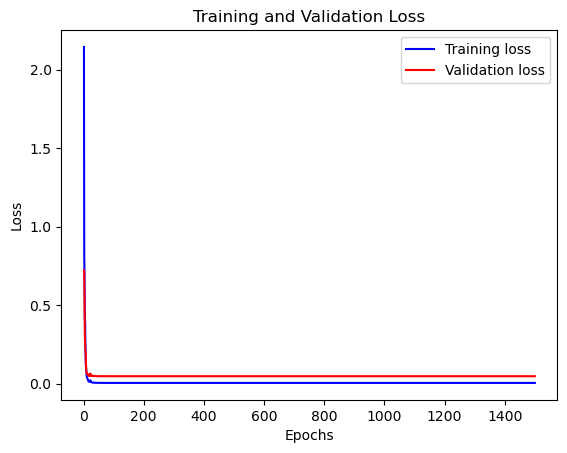

In [44]:

plot_train_val_loss(history, skip = 0, log=False)

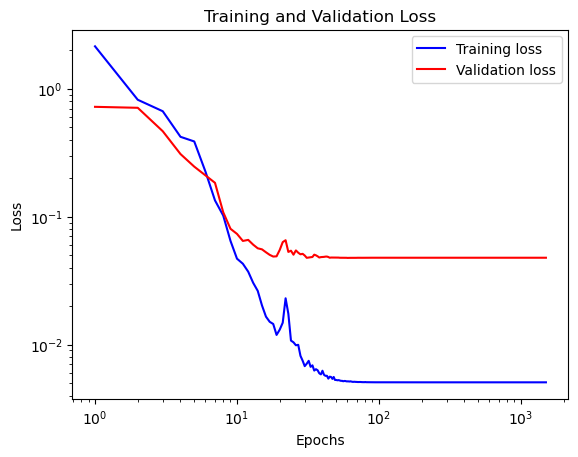

In [45]:
plot_train_val_loss(history, skip = 0, log=True)

##### Ridge

In [46]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Ridge regression model with regularizer
ridge_model = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = ridge_model.predict(X_train)

# MAE on the training set
mse_train = mean_absolute_error(y_train, y_train_pred)
print(f"Mean Squared Error on Training Set: {mse_train}")

#prediction
y_pred = ridge_model.predict(X_test)

# MAE on the test set
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")


#MAPE
np.mean(np.abs((y_pred - y_test.values)/y_test.values))*100

Mean Squared Error on Training Set: 0.48909773376153715
Mean Absolute Error on Test Set: 0.6494450144880266


34.800839862915986

### 1.2 use GT and previous GERD

In [47]:
gt_gerd_df = merged_df[GT_features+prev_GERD_fetures+y]

In [48]:
gt_gerd_df

,Computers & Electronics,Enterprise Technology,Science,Jobs & Education,Law & Government,Internet & Telecom,Industrial Materials & Equipment,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,Energy & Utilities,Chemicals Industry,Medical Devices & Equipment,Construction & Maintenance,Health,Robotics,Technology News,v-1,v-2,v
0,-1.025839,0.315503,-1.077294,-1.234002,-1.09476,-1.150765,-1.188673,-1.018052,-0.963506,-1.137081,0.256757,-1.354092,0.472359,0.537909,-0.039485,-0.320359,-0.902897,2.179564,2.243715,2.113019
1,-1.025839,0.642648,-1.077294,-1.234002,-1.09476,-1.150765,-1.188673,-1.018052,-0.963506,-1.137081,0.474616,-1.354092,1.115119,0.954252,0.454035,-0.130145,-0.902897,2.113019,2.179564,2.093805
2,-1.025839,0.526565,-1.077294,-1.234002,-1.09476,-1.150765,-1.188673,-1.018052,-0.963506,-1.137081,0.314351,-1.354092,1.152759,1.010913,0.544471,-0.036500,-0.902897,2.093805,2.113019,1.881043
3,-1.025839,0.357716,0.150327,-1.234002,-1.09476,-1.150765,0.722627,0.209660,0.044565,0.083223,0.341897,0.865299,-1.192449,-1.230930,0.593565,0.662904,0.897091,1.881043,2.093805,1.794278
4,-1.025839,0.373545,0.142541,-1.234002,-1.09476,-1.150765,0.712620,0.198747,0.015204,0.112072,0.517186,0.955995,-1.192449,-1.230930,0.766684,0.724358,0.667437,1.794278,1.881043,1.798561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,-0.116418,-1.164563,0.399485,-1.234002,-1.09476,-1.150765,0.379894,-1.018052,-0.089192,-1.137081,0.512178,0.627888,-1.192449,-1.230930,-1.315919,0.683388,1.343984,3.247361,3.219035,3.362786
230,-0.127023,-1.164563,0.438416,-1.234002,-1.09476,-1.150765,0.344870,-1.018052,-0.098979,-1.137081,0.602326,0.766600,-1.192449,-1.230930,-1.315919,0.648272,1.353295,3.362786,3.247361,3.321061
231,-0.172096,-1.164563,0.394294,-1.234002,-1.09476,-1.150765,0.289832,-1.018052,-0.108766,-1.137081,0.509673,0.713249,-1.192449,-1.230930,-1.315919,0.610229,1.312950,3.321061,3.362786,3.387582
232,-0.206564,-1.164563,0.342387,-1.234002,-1.09476,-1.150765,0.279826,-1.018052,-0.131603,-1.137081,0.584797,0.750595,-1.192449,-1.230930,-1.315919,0.487321,1.204330,3.387582,3.321061,3.489604


In [49]:
# Split into train and test sets
train_df, test_df = train_test_split(gt_gerd_df, test_size=0.2, random_state=42)



X_train = train_df.drop(y, axis=1)
y_train = train_df['v']


X_test = test_df.drop(y, axis=1)
y_test = test_df['v']

In [50]:
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# NN with several layers
model = Sequential([
    Dense(1024, input_shape=(len(GT_features+prev_GERD_fetures),)),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(1)
])

# Compile the model with an initial lr
initial_learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Fit the model
model.fit(X_train, y_train, epochs=1500, batch_size=10, callbacks=[lr_scheduler], validation_split=0.2)


# Prediction
y_pred = model.predict(X_test)


# Calculate the MAE test set
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

Epoch 1/1500
15/15 [==============================] - 1s 12ms/step - loss: 7.0878 - val_loss: 0.9073 - lr: 0.0100
Epoch 2/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.5658 - val_loss: 0.2201 - lr: 0.0100
Epoch 3/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.1772 - val_loss: 0.0846 - lr: 0.0100
Epoch 4/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0490 - val_loss: 0.0332 - lr: 0.0100
Epoch 5/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0369 - val_loss: 0.0362 - lr: 0.0100
Epoch 6/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0266 - val_loss: 0.0562 - lr: 0.0100
Epoch 7/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0400 - val_loss: 0.0391 - lr: 0.0100
Epoch 8/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0271 - lr: 0.0100
Epoch 9/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.

Epoch 72/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0174 - lr: 5.5166e-05
Epoch 73/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0171 - lr: 4.9916e-05
Epoch 74/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0174 - lr: 4.5166e-05
Epoch 75/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0174 - lr: 4.0868e-05
Epoch 76/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0173 - lr: 3.6979e-05
Epoch 77/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0049 - val_loss: 0.0174 - lr: 3.3460e-05
Epoch 78/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0173 - lr: 3.0276e-05
Epoch 79/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0174 - lr: 2.7394e-05
Epoch 80/1500
15/15 [==============================] - 0

15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.5595e-08
Epoch 142/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.0305e-08
Epoch 143/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.5518e-08
Epoch 144/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.1186e-08
Epoch 145/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.7267e-08
Epoch 146/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.3720e-08
Epoch 147/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.0511e-08
Epoch 148/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.7608e-08
Epoch 149/1500
15/15 [==============================] - 0s 8ms/

Epoch 210/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.6028e-11
Epoch 211/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.0696e-11
Epoch 212/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.5872e-11
Epoch 213/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.1507e-11
Epoch 214/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.7557e-11
Epoch 215/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.3983e-11
Epoch 216/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.0749e-11
Epoch 217/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.7823e-11
Epoch 218/1500
15/15 [==========================

Epoch 279/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.6464e-14
Epoch 280/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.1091e-14
Epoch 281/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.6229e-14
Epoch 282/1500
15/15 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.1830e-14
Epoch 283/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.7849e-14
Epoch 284/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.4247e-14
Epoch 285/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.0988e-14
Epoch 286/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.8039e-14
Epoch 287/1500
15/15 [==========================

Epoch 348/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.6904e-17
Epoch 349/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.1489e-17
Epoch 350/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.6589e-17
Epoch 351/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.2156e-17
Epoch 352/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.8144e-17
Epoch 353/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.4514e-17
Epoch 354/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.1230e-17
Epoch 355/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.8258e-17
Epoch 356/1500
15/15 [==========================

Epoch 417/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.7347e-20
Epoch 418/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.1890e-20
Epoch 419/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.6952e-20
Epoch 420/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.2484e-20
Epoch 421/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.8441e-20
Epoch 422/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.4783e-20
Epoch 423/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.1473e-20
Epoch 424/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.8478e-20
Epoch 425/1500
15/15 [==========================

Epoch 486/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.7794e-23
Epoch 487/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.2294e-23
Epoch 488/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.7317e-23
Epoch 489/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.2815e-23
Epoch 490/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.8740e-23
Epoch 491/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.5054e-23
Epoch 492/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.1718e-23
Epoch 493/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.8699e-23
Epoch 494/1500
15/15 [==========================

Epoch 555/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.8244e-26
Epoch 556/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.2701e-26
Epoch 557/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.7686e-26
Epoch 558/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.3148e-26
Epoch 559/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.9042e-26
Epoch 560/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.5327e-26
Epoch 561/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.1965e-26
Epoch 562/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.8923e-26
Epoch 563/1500
15/15 [==========================

Epoch 624/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.8697e-29
Epoch 625/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.3111e-29
Epoch 626/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.8057e-29
Epoch 627/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.3484e-29
Epoch 628/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.9346e-29
Epoch 629/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.5602e-29
Epoch 630/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.2214e-29
Epoch 631/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.9148e-29
Epoch 632/1500
15/15 [==========================

Epoch 693/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.9154e-32
Epoch 694/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.3525e-32
Epoch 695/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.8431e-32
Epoch 696/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.3822e-32
Epoch 697/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.9652e-32
Epoch 698/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.5879e-32
Epoch 699/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.2464e-32
Epoch 700/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.9375e-32
Epoch 701/1500
15/15 [==========================

Epoch 762/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.9615e-35
Epoch 763/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.3942e-35
Epoch 764/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.8808e-35
Epoch 765/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.4164e-35
Epoch 766/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.9961e-35
Epoch 767/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.6158e-35
Epoch 768/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.2717e-35
Epoch 769/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.9604e-35
Epoch 770/1500
15/15 [==========================

Epoch 831/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 6.0079e-38
Epoch 832/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 5.4362e-38
Epoch 833/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.9188e-38
Epoch 834/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.4508e-38
Epoch 835/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 4.0272e-38
Epoch 836/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.6440e-38
Epoch 837/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 3.2972e-38
Epoch 838/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 2.9834e-38
Epoch 839/1500
15/15 [==========================

Epoch 900/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 901/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 902/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 903/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 904/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 905/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 906/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 907/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 908/1500
15/15 [==========================

Epoch 969/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 970/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 971/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 972/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 973/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 974/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 975/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 976/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 977/1500
15/15 [==========================

15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1106/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1107/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1108/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1109/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1110/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1111/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1112/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1113/1500
15/15 [==============================] -

15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1242/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1243/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1244/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1245/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1246/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1247/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1248/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1249/1500
15/15 [==============================] -

15/15 [==============================] - 0s 8ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1378/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1379/1500
15/15 [==============================] - 0s 6ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1380/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1381/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1382/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1383/1500
15/15 [==============================] - 0s 5ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1384/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0174 - lr: 0.0000e+00
Epoch 1385/1500
15/15 [==============================] -

In [51]:
np.mean(np.abs((y_pred.reshape(-1) - y_test.values.reshape(-1))/y_test.values.reshape(-1)*100))

4.723066832286671

### adding a convolution layer

In [52]:
data_size = len(GT_features + prev_GERD_fetures) 
padded_data_size = 20  
padding = padded_data_size - data_size

#fct used to reshape training and test set
def reshape_data(data):
    padded = np.pad(data, ((0, 0), (0, padding)), 'constant')
    reshaped = padded.reshape((-1, 5, 4, 1))  
    return reshaped

# Reshape data
X_train_r = reshape_data(X_train)
X_test_r = reshape_data(X_test)

#model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(5, 4, 1)),
    Flatten(),
    Dense(1024),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(1)
])

#initial lr
initial_learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Fit the model
h_conv = model.fit(X_train_r, y_train, epochs=1500, batch_size=10, callbacks=[lr_scheduler], validation_split=0.2)


# Prediction
y_pred = model.predict(X_test_r)


# Calculate the MAE test set
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

Epoch 1/1500
15/15 [==============================] - 1s 15ms/step - loss: 3.6042 - val_loss: 0.6077 - lr: 0.0100
Epoch 2/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.4524 - val_loss: 0.1807 - lr: 0.0100
Epoch 3/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.1841 - val_loss: 0.0531 - lr: 0.0100
Epoch 4/1500
15/15 [==============================] - 0s 10ms/step - loss: 0.0527 - val_loss: 0.0456 - lr: 0.0100
Epoch 5/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0390 - val_loss: 0.0583 - lr: 0.0100
Epoch 6/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0323 - val_loss: 0.0508 - lr: 0.0100
Epoch 7/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0307 - val_loss: 0.0224 - lr: 0.0100
Epoch 8/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0139 - val_loss: 0.0243 - lr: 0.0100
Epoch 9/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0143 - val_loss: 0

Epoch 72/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.5166e-05
Epoch 73/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0173 - lr: 4.9916e-05
Epoch 74/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0173 - lr: 4.5166e-05
Epoch 75/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.0868e-05
Epoch 76/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.6979e-05
Epoch 77/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0174 - lr: 3.3460e-05
Epoch 78/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.0276e-05
Epoch 79/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 0.0173 - lr: 2.7394e-05
Epoch 80/1500
15/15 [==============================] - 0

15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.5595e-08
Epoch 142/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.0305e-08
Epoch 143/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.5518e-08
Epoch 144/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.1186e-08
Epoch 145/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.7267e-08
Epoch 146/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.3720e-08
Epoch 147/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.0511e-08
Epoch 148/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.7608e-08
Epoch 149/1500
15/15 [==============================] - 0s 8ms/

Epoch 210/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.6028e-11
Epoch 211/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.0696e-11
Epoch 212/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.5872e-11
Epoch 213/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.1507e-11
Epoch 214/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.7557e-11
Epoch 215/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.3983e-11
Epoch 216/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.0749e-11
Epoch 217/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.7823e-11
Epoch 218/1500
15/15 [==========================

Epoch 279/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.6464e-14
Epoch 280/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.1091e-14
Epoch 281/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.6229e-14
Epoch 282/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.1830e-14
Epoch 283/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.7849e-14
Epoch 284/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.4247e-14
Epoch 285/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.0988e-14
Epoch 286/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.8039e-14
Epoch 287/1500
15/15 [==========================

Epoch 348/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.6904e-17
Epoch 349/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.1489e-17
Epoch 350/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.6589e-17
Epoch 351/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.2156e-17
Epoch 352/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.8144e-17
Epoch 353/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.4514e-17
Epoch 354/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.1230e-17
Epoch 355/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.8258e-17
Epoch 356/1500
15/15 [==========================

Epoch 417/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.7347e-20
Epoch 418/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.1890e-20
Epoch 419/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.6952e-20
Epoch 420/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.2484e-20
Epoch 421/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.8441e-20
Epoch 422/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.4783e-20
Epoch 423/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.1473e-20
Epoch 424/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.8478e-20
Epoch 425/1500
15/15 [==========================

Epoch 486/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.7794e-23
Epoch 487/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.2294e-23
Epoch 488/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.7317e-23
Epoch 489/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.2815e-23
Epoch 490/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.8740e-23
Epoch 491/1500
15/15 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.5054e-23
Epoch 492/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.1718e-23
Epoch 493/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.8699e-23
Epoch 494/1500
15/15 [=========================

Epoch 555/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.8244e-26
Epoch 556/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.2701e-26
Epoch 557/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.7686e-26
Epoch 558/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.3148e-26
Epoch 559/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.9042e-26
Epoch 560/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.5327e-26
Epoch 561/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.1965e-26
Epoch 562/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.8923e-26
Epoch 563/1500
15/15 [==========================

Epoch 624/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.8697e-29
Epoch 625/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.3111e-29
Epoch 626/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.8057e-29
Epoch 627/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.3484e-29
Epoch 628/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.9346e-29
Epoch 629/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.5602e-29
Epoch 630/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.2214e-29
Epoch 631/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.9148e-29
Epoch 632/1500
15/15 [==========================

Epoch 693/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.9154e-32
Epoch 694/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.3525e-32
Epoch 695/1500
15/15 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.8431e-32
Epoch 696/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.3822e-32
Epoch 697/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.9652e-32
Epoch 698/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.5879e-32
Epoch 699/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.2464e-32
Epoch 700/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.9375e-32
Epoch 701/1500
15/15 [=========================

Epoch 762/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.9615e-35
Epoch 763/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.3942e-35
Epoch 764/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.8808e-35
Epoch 765/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.4164e-35
Epoch 766/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.9961e-35
Epoch 767/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.6158e-35
Epoch 768/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.2717e-35
Epoch 769/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.9604e-35
Epoch 770/1500
15/15 [==========================

Epoch 831/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 6.0079e-38
Epoch 832/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 5.4362e-38
Epoch 833/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.9188e-38
Epoch 834/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.4508e-38
Epoch 835/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 4.0272e-38
Epoch 836/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.6440e-38
Epoch 837/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 3.2972e-38
Epoch 838/1500
15/15 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 2.9834e-38
Epoch 839/1500
15/15 [=========================

Epoch 900/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 901/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 902/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 903/1500
15/15 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 904/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 905/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 906/1500
15/15 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 907/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 908/1500
15/15 [========================

Epoch 969/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 970/1500
15/15 [==============================] - 0s 10ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 971/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 972/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 973/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 974/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 975/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 976/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 977/1500
15/15 [=========================

15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1106/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1107/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1108/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1109/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1110/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1111/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1112/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1113/1500
15/15 [==============================] -

15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1242/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1243/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1244/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1245/1500
15/15 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1246/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1247/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1248/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1249/1500
15/15 [==============================] -

15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1378/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1379/1500
15/15 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1380/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1381/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1382/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1383/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1384/1500
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0172 - lr: 0.0000e+00
Epoch 1385/1500
15/15 [==============================] -

In [53]:
#MAPE
np.mean(np.abs((y_pred.reshape(-1) - y_test.values.reshape(-1))/y_test.values.reshape(-1)*100))

4.831077081715106

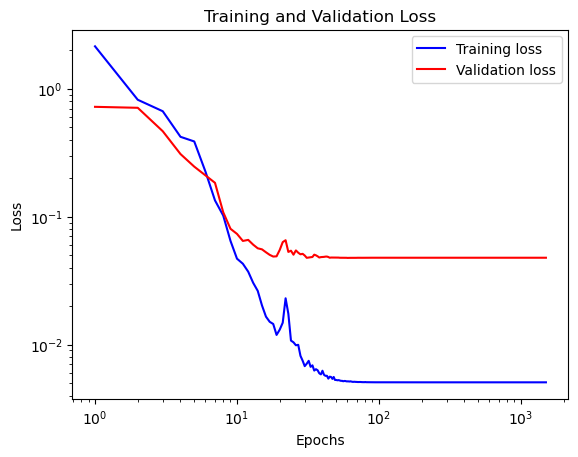

In [54]:
plot_train_val_loss(history, skip = 0, log=True)

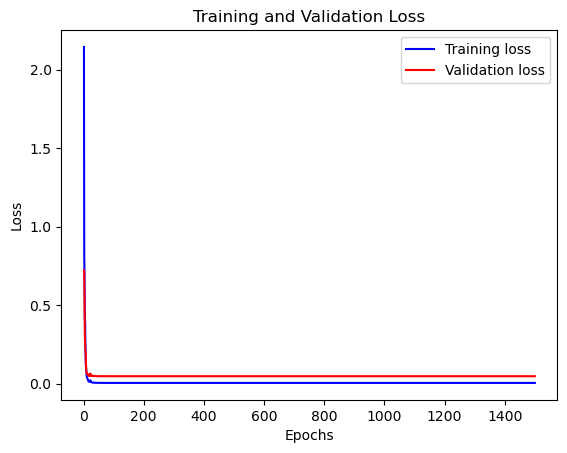

In [55]:
plot_train_val_loss(history, skip = 0, log=False)

### 1.3 Use GT + previous GERD + macro variables

In [56]:
all_features_df = merged_df[GT_features+prev_GERD_fetures+macro_var_features+y]

In [57]:
# Split into train and test sets
train_df, test_df = train_test_split(all_features_df, test_size=0.2, random_state=42)


X_train = train_df.drop(y, axis=1)
y_train = train_df['v']


X_test = test_df.drop(y, axis=1)
y_test = test_df['v']

In [58]:
# mean and std of the train set
mean_train = train_df[macro_var_features].mean()
std_train = train_df[macro_var_features].std()

# Normalize training set
train_df[macro_var_features] = (train_df[macro_var_features] - mean_train) / std_train

# Normalize test set
test_df[macro_var_features] = (test_df[macro_var_features] - mean_train) / std_train

train_df

,Computers & Electronics,Enterprise Technology,Science,Jobs & Education,Law & Government,Internet & Telecom,Industrial Materials & Equipment,Biotechnology & Pharmaceuticals,Aerospace & Defense,Automotive Industry,...,GDP,Inflation,Govt_Debt,Unemployment,Govt_Expenditure,Total_Investment,National_Savings,Inflation_EoP,Account_Balance,v
117,-1.025839,0.542394,-1.077294,-1.234002,-1.094760,-1.150765,-1.188673,-1.018052,-0.963506,0.195733,...,0.485696,1.952866,0.527904,0.252885,0.017967,-1.311746,-1.488117,1.692732,-0.742100,1.576311
155,-1.025839,-1.164563,0.152923,-1.234002,0.826049,-1.150765,0.742640,-1.018052,-0.963506,-1.137081,...,1.553756,-0.724296,2.130990,-1.059377,-0.644365,0.221379,0.388224,-0.661156,0.324275,3.219196
148,0.093041,-1.164563,0.054298,0.231201,-1.094760,-1.150765,-1.188673,-1.018052,0.312079,-1.137081,...,1.944562,-1.551612,1.729108,-0.503873,-0.541880,-0.207439,0.031257,-1.180729,0.272142,3.205366
158,-1.025839,-1.164563,0.080252,-1.234002,0.652526,-1.150765,0.492470,-1.018052,-0.963506,-1.137081,...,1.609411,-1.069628,2.430002,-1.069825,0.117936,0.229220,0.247226,-1.599614,0.108735,3.295810
231,-0.172096,-1.164563,0.394294,-1.234002,-1.094760,-1.150765,0.289832,-1.018052,-0.108766,-1.137081,...,-0.510803,0.319104,-0.843038,-0.140918,0.526812,0.350922,0.283486,0.417359,0.027840,3.387582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-1.025839,-1.164563,-1.077294,-1.234002,-1.094760,-1.150765,-1.188673,-1.018052,-0.963506,-1.137081,...,0.578808,0.486721,0.629789,0.528522,1.252919,-0.104359,-0.467075,0.683923,-0.572221,2.227066
14,-1.025839,-1.164563,0.023153,-1.234002,-1.094760,-0.061615,0.262314,-0.054980,0.217471,-1.137081,...,-0.563078,-0.049116,0.034091,-0.563827,0.509489,0.243269,0.190998,0.163059,0.010762,3.201486
92,-1.025839,0.080698,-1.077294,0.082826,-1.094760,-0.258333,0.434931,0.166008,0.615480,-0.262963,...,-0.114908,-0.527060,0.782449,1.746748,-0.102616,-0.495114,-0.396637,-0.470109,-0.039213,1.410390
179,-1.025839,0.381460,-1.077294,-1.234002,-1.094760,-1.150765,-1.188673,0.654365,-0.963506,1.444885,...,-0.580030,0.407288,-2.526697,-0.834737,0.663749,0.937708,0.885576,-0.134484,0.263873,2.244363


In [59]:
# Define a learning rate scheduler function
def scheduler(epoch, lr):
    if epoch < 20:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# NN with several layers
model = Sequential([
    Dense(1024, input_shape=(len(GT_features+prev_GERD_fetures+macro_var_features),)),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(256),
    Activation('relu'),
    Dense(128),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(1)
])

# Compile the model with an initial lr
initial_learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Fit the model
model.fit(X_train, y_train, epochs=1000, batch_size=20, callbacks=[lr_scheduler], validation_split=0.2)


# Prediction
y_pred = model.predict(X_test)


# Calculate the MAE test set
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

Epoch 1/1000
8/8 [==============================] - 1s 26ms/step - loss: 2126737.7500 - val_loss: 343984.4062 - lr: 0.0100
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 175644.9844 - val_loss: 433.3211 - lr: 0.0100
Epoch 3/1000
8/8 [==============================] - 0s 12ms/step - loss: 115.2654 - val_loss: 72.2405 - lr: 0.0100
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 99.5147 - val_loss: 272.2566 - lr: 0.0100
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 129.6481 - val_loss: 52.3966 - lr: 0.0100
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 20.2773 - val_loss: 94.3418 - lr: 0.0100
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 21.6926 - val_loss: 29.0224 - lr: 0.0100
Epoch 8/1000
8/8 [==============================] - 0s 10ms/step - loss: 144.0400 - val_loss: 2.5922 - lr: 0.0100
Epoch 9/1000
8/8 [==============================] - 0s 11ms/step - loss: 

8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 5.0305e-08
Epoch 143/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 4.5518e-08
Epoch 144/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 4.1186e-08
Epoch 145/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.7267e-08
Epoch 146/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.3720e-08
Epoch 147/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.0511e-08
Epoch 148/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.7608e-08
Epoch 149/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.4981e-08
Epoch 150/1000
8/8 [==============================] - 0s 10ms/step - loss: 

Epoch 212/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 4.5872e-11
Epoch 213/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 4.1507e-11
Epoch 214/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.7557e-11
Epoch 215/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.3983e-11
Epoch 216/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.0749e-11
Epoch 217/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.7823e-11
Epoch 218/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.5175e-11
Epoch 219/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.2779e-11
Epoch 220/1000
8/8 [==============================] - 0s 9

Epoch 282/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 4.1830e-14
Epoch 283/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.7849e-14
Epoch 284/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.4247e-14
Epoch 285/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.0988e-14
Epoch 286/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.8039e-14
Epoch 287/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.5371e-14
Epoch 288/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.2957e-14
Epoch 289/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.0772e-14
Epoch 290/1000
8/8 [==============================] - 0s 10

Epoch 352/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.8144e-17
Epoch 353/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.4514e-17
Epoch 354/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.1230e-17
Epoch 355/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.8258e-17
Epoch 356/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.5569e-17
Epoch 357/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.3135e-17
Epoch 358/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.0934e-17
Epoch 359/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.8942e-17
Epoch 360/1000
8/8 [==============================] - 0s 10

Epoch 422/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.4783e-20
Epoch 423/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.1473e-20
Epoch 424/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.8478e-20
Epoch 425/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.5768e-20
Epoch 426/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.3316e-20
Epoch 427/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.1097e-20
Epoch 428/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.9089e-20
Epoch 429/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.7273e-20
Epoch 430/1000
8/8 [==============================] - 0s 8ms

Epoch 492/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 3.1718e-23
Epoch 493/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.8699e-23
Epoch 494/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.5968e-23
Epoch 495/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.3497e-23
Epoch 496/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.1261e-23
Epoch 497/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.9238e-23
Epoch 498/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.7407e-23
Epoch 499/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.5751e-23
Epoch 500/1000
8/8 [==============================] - 0s 10

Epoch 562/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.8923e-26
Epoch 563/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.6171e-26
Epoch 564/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.3680e-26
Epoch 565/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.1427e-26
Epoch 566/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.9388e-26
Epoch 567/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.7543e-26
Epoch 568/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.5873e-26
Epoch 569/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.4363e-26
Epoch 570/1000
8/8 [==============================] - 0s 9ms/ste

Epoch 632/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.6374e-29
Epoch 633/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.3864e-29
Epoch 634/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.1593e-29
Epoch 635/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.9539e-29
Epoch 636/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.7679e-29
Epoch 637/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.5997e-29
Epoch 638/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.4475e-29
Epoch 639/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.3097e-29
Epoch 640/1000
8/8 [==============================] - 0s 12ms

Epoch 702/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.4050e-32
Epoch 703/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.1762e-32
Epoch 704/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.9691e-32
Epoch 705/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.7817e-32
Epoch 706/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.6121e-32
Epoch 707/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.4587e-32
Epoch 708/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.3199e-32
Epoch 709/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.1943e-32
Epoch 710/1000
8/8 [==============================] - 0s 10

Epoch 772/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 2.1931e-35
Epoch 773/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.9844e-35
Epoch 774/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.7956e-35
Epoch 775/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.6247e-35
Epoch 776/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.4701e-35
Epoch 777/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.3302e-35
Epoch 778/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.2036e-35
Epoch 779/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.0891e-35
Epoch 780/1000
8/8 [==============================] - 0s 8ms/

Epoch 842/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.9999e-38
Epoch 843/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.8095e-38
Epoch 844/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.6373e-38
Epoch 845/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.4815e-38
Epoch 846/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.3405e-38
Epoch 847/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 1.2130e-38
Epoch 848/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 849/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 850/1000
8/8 [==============================] - 0s 9m

Epoch 912/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 913/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 914/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 915/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 916/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 917/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 918/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 919/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 920/1000
8/8 [==============================] - 0s 1

Epoch 982/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 983/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 984/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 985/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 986/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 987/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 988/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 989/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.2924 - val_loss: 0.2047 - lr: 0.0000e+00
Epoch 990/1000
8/8 [==============================] - 0s 9ms/

In [60]:
#MAPE
np.mean(np.abs((y_pred.reshape(-1) - y_test.values.reshape(-1))/y_test.values.reshape(-1)))*100

28.723032225648403

### correlation between features and y

In [61]:
# Convert y_train to a df
y_train_df = pd.DataFrame(y_train)

#join all data
data = X_train.join(y_train_df, how='inner')

# Compute correlation matrix
correlation_matrix = data.corr()

# absolute correlation values with the target variable
feature_correlation = correlation_matrix['v'].abs().sort_values(ascending=False)

# Drop the target variable correlation with itself
feature_correlation = feature_correlation.drop(labels=['v'])

#features in order of correlation importance
print("Features in order of importance based on correlation with the target variable:")
print(feature_correlation)

Features in order of importance based on correlation with the target variable:
v-1                                 0.989538
v-2                                 0.976246
Unemployment                        0.374810
Govt_Expenditure                    0.278077
Account_Balance                     0.259311
Aerospace & Defense                 0.239914
Chemicals Industry                  0.208667
Inflation_EoP                       0.204308
Biotechnology & Pharmaceuticals     0.203575
Inflation                           0.202829
Computers & Electronics             0.192636
National_Savings                    0.190403
Health                              0.182950
Energy & Utilities                  0.153107
GDP                                 0.140007
Robotics                            0.138611
Automotive Industry                 0.124278
Science                             0.096790
Industrial Materials & Equipment    0.067233
Jobs & Education                    0.042854
Law & Government     

#### Observation
- v-1 and v-2 are the GERD from the 2 previous available years. Those features have high correlation. Thus clearly the most important for the model.
- Surprisingly, we observe that some of google trends data are quite correlated to y, thus the could be useful. For instance 'Biotechnology & Pharmaceuticals' with a coef of 0.203575 or 'Aerospace & Defense' with a coef of 0.239914
- with only GT we have a MAPE of ~8%, using all the features, the MAPE is of 5%

=> Our idea would be to just use GT data to predict GERD by looking for more correlated categories and tuning models in order to achieve better MAPE